# 🐸 파이썬으로 데이터 주무르기 

## 3장 시카고 샌드위치 맛집 분석

일자: 2020-03-24 ~

In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd

In [4]:
url_base = 'https://movie.naver.com/'
url_syb = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20200327'

page = url_base+url_syb 
html = urlopen(page)
soup = BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20200327" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [7]:
soup.find_all('div', class_='tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=19099" title="트루먼 쇼">트루먼 쇼</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=31013" title="빌리 엘리어트">빌리 엘리어트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189111" title="두 교황">두 교황</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=47152" title="테이큰">테이큰</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=148338" title="동급생">동급생</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=187308" title="조조 래빗">조조 래빗</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=168050" title="스타 이즈 본">스타 이즈 본</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=92075" title="어바웃 타임">어바웃 타임</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=158578" title="흑집사 : 북 오브 더 아틀란틱">흑집사 : 북 오브 더 아틀란틱</a>
 <

In [20]:
soup.find_all('div', class_='tit5')[0].a['title']

'포드 V 페라리'

In [21]:
soup.find_all('div', class_='tit5')[0].a.string

'포드 V 페라리'

In [26]:
soup.find_all('td', class_='point')[0].string

'9.50'

In [33]:
date = pd.date_range('2019-12-01', periods=100, freq='D')
date

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16',
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28',
               '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01',
               '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13',
               '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17',
               '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
      

In [34]:
import urllib 

url = urllib.parse.quote('파이썬')
url

'%ED%8C%8C%EC%9D%B4%EC%8D%AC'

In [51]:
date = pd.date_range('2019-12-01', periods=10, freq='D')[0]
url = urllib.parse.quote(date.strftime('date'))
url

'date'

- [extend()와 append()의 차이점](https://hashcode.co.kr/questions/23/파이썬에-append와-extend의-차이점)

In [55]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, "html.parser")
    
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [56]:
movie_date[:5]

[Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D'),
 Timestamp('2019-12-01 00:00:00', freq='D')]

In [57]:
movie_name[:5]

['주전장', '교회오빠', '시간을 달리는 소녀', '윤희에게', '늑대아이']

In [58]:
movie_point[:5]

['9.49', '9.27', '9.20', '9.17', '9.11']

In [108]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name,
                     'point':movie_point})
movie.head(30)

date               name point
0  2019-12-01                주전장  9.49
1  2019-12-01               교회오빠  9.27
2  2019-12-01         시간을 달리는 소녀  9.20
3  2019-12-01               윤희에게  9.17
4  2019-12-01               늑대아이  9.11
5  2019-12-01                미쓰백  9.10
6  2019-12-01              아이리시맨  8.96
7  2019-12-01                 벌새  8.89
8  2019-12-01           여배우는 오늘도  8.84
9  2019-12-01            너의 이름은.  8.76
10 2019-12-01                 접속  8.70
11 2019-12-01              썸머 워즈  8.68
12 2019-12-01             겨울왕국 2  8.67
13 2019-12-01    진짜로 일어날지도 몰라 기적  8.67
14 2019-12-01                 조커  8.65
15 2019-12-01         람보 : 라스트 워  8.63
16 2019-12-01              닥터 슬립  8.62
17 2019-12-01      터미네이터: 다크 페이트  8.62
18 2019-12-01               블랙머니  8.57
19 2019-12-01         더 킹: 헨리 5세  8.56
20 2019-12-01           엔젤 해즈 폴른  8.55
21 2019-12-01                족구왕  8.53
22 2019-12-01             괴물의 아이  8.53
23 2019-12-01                 메기  8.34
24 2019-12-01              해피 엔드  8.27
25 2019-12-01              멋진 하루  8.17
26 2019-12-01             언어의 정원  8.16
27 2019-12-01         좀비랜드: 더블 탭  8.14
28 2019-12-01        신의 한 수: 귀수편  8.02
29 2019-12-01  별을 쫓는 아이:아가르타의 전설  7.92

In [109]:
movie['point'] = movie['point'].astype('float')

In [110]:
movie['point'].sum()

3928.33

In [106]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

point
name           
포드 V 페라리  9.615
가버나움      9.590
주전장       9.490
포레스트 검프   9.390
알라딘       9.380

- [pandas query 함수](https://kongdols-room.tistory.com/120)

In [120]:
tmp = movie.query('name == ["82년생 김지영"]')
tmp

date      name  point
39  2019-12-01  82년생 김지영   6.69
87  2019-12-02  82년생 김지영   6.69
133 2019-12-03  82년생 김지영   6.69
181 2019-12-04  82년생 김지영   6.68
231 2019-12-05  82년생 김지영   6.68
283 2019-12-06  82년생 김지영   6.68
334 2019-12-07  82년생 김지영   6.68
380 2019-12-08  82년생 김지영   6.68
428 2019-12-09  82년생 김지영   6.68
478 2019-12-10  82년생 김지영   6.68

In [114]:
movie.loc[movie['name'] == '메기', ['name','point']]

name  point
23    메기   8.34
70    메기   8.33
118   메기   8.32
167   메기   8.32
218   메기   8.32
269   메기   8.32
320   메기   8.32
366   메기   8.31
414   메기   8.31
465   메기   8.31

In [101]:
type(tmp)

pandas.core.frame.DataFrame

No handles with labels found to put in legend.


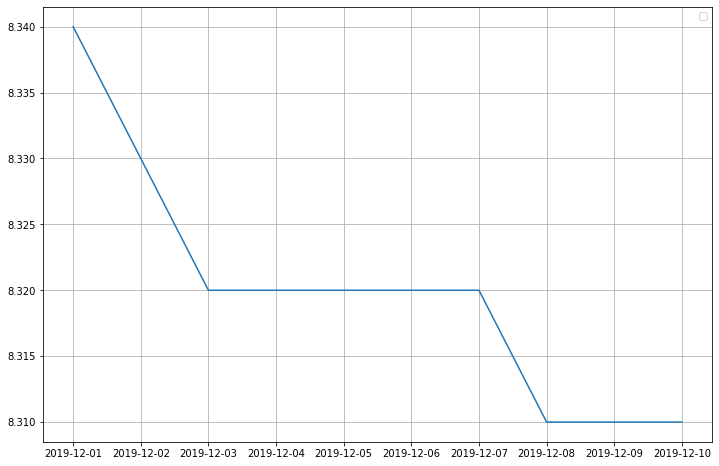

In [116]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [118]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                          \
name       82년생 김지영 가버나움 가장 보통의 연애 감쪽같은 그녀 겨울왕국 2 괴물의 아이  교회오빠 그랜드 부다페스트 호텔   
date                                                                          
2019-12-01     6.69  NaN      7.83     NaN   8.67   8.53  9.27          NaN   
2019-12-02     6.69  NaN      7.83     NaN   8.67   8.53  9.27          NaN   
2019-12-03     6.69  NaN       NaN     NaN   8.66   8.53  9.27          NaN   
2019-12-04     6.68  NaN       NaN     NaN   8.66   8.53  9.27          NaN   
2019-12-05     6.68  NaN       NaN     NaN   8.66   8.53  9.27          NaN   

                              ...                                       \
name         기생충 나, 다니엘 블레이크  ...    크롤 킹 오브 프리즘 킹 오브 프리즘 -샤이니 세븐 스타즈-   
date                          ...                                        
2019-12-01   NaN         NaN  ...  7.20      NaN                   NaN   
2019-12-02  8.49         NaN  ...  7.10     9.17                  2.06   
2019-12-03  8.49         NaN  ...  7.06     9.17                  2.06   
2019-12-04  8.49         NaN  ...  7.02     9.17                  2.06   
2019-12-05  8.49         NaN  ...  7.01     9.17                  2.06   

                                                                            \
name       킹 오브 프리즘 프라이드 더 히어로 터미네이터: 다크 페이트 판소리 복서 포드 V 페라리 포레스트 검프 해피 엔드   
date                                                                         
2019-12-01                 NaN          8.62   6.09      NaN     NaN  8.27   
2019-12-02                9.12          8.62    NaN      NaN     NaN  8.27   
2019-12-03                9.12          8.63    NaN      NaN     NaN  8.27   
2019-12-04                9.12          8.63    NaN      NaN     NaN  8.27   
2019-12-05                9.12          8.62    NaN     9.65    9.39  8.27   

                        
name       행동하는 양심 김대중  
date                    
2019-12-01         NaN  
2019-12-02         NaN  
2019-12-03        2.83  
2019-12-04        3.19  
2019-12-05        3.15  

[5 rows x 73 columns]

In [121]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name        82년생 김지영  가버나움  가장 보통의 연애  감쪽같은 그녀  겨울왕국 2  괴물의 아이  교회오빠  \
date                                                                   
2019-12-01      6.69   NaN       7.83      NaN    8.67    8.53  9.27   
2019-12-02      6.69   NaN       7.83      NaN    8.67    8.53  9.27   
2019-12-03      6.69   NaN        NaN      NaN    8.66    8.53  9.27   
2019-12-04      6.68   NaN        NaN      NaN    8.66    8.53  9.27   
2019-12-05      6.68   NaN        NaN      NaN    8.66    8.53  9.27   

name        그랜드 부다페스트 호텔   기생충  나, 다니엘 블레이크  ...    크롤  킹 오브 프리즘  \
date                                         ...                   
2019-12-01           NaN   NaN          NaN  ...  7.20       NaN   
2019-12-02           NaN  8.49          NaN  ...  7.10      9.17   
2019-12-03           NaN  8.49          NaN  ...  7.06      9.17   
2019-12-04           NaN  8.49          NaN  ...  7.02      9.17   
2019-12-05           NaN  8.49          NaN  ...  7.01      9.17   

name        킹 오브 프리즘 -샤이니 세븐 스타즈-  킹 오브 프리즘 프라이드 더 히어로  터미네이터: 다크 페이트  판소리 복서  \
date                                                                            
2019-12-01                    NaN                  NaN           8.62    6.09   
2019-12-02                   2.06                 9.12           8.62     NaN   
2019-12-03                   2.06                 9.12           8.63     NaN   
2019-12-04                   2.06                 9.12           8.63     NaN   
2019-12-05                   2.06                 9.12           8.62     NaN   

name        포드 V 페라리  포레스트 검프  해피 엔드  행동하는 양심 김대중  
date                                               
2019-12-01       NaN      NaN   8.27          NaN  
2019-12-02       NaN      NaN   8.27          NaN  
2019-12-03       NaN      NaN   8.27         2.83  
2019-12-04       NaN      NaN   8.27         3.19  
2019-12-05      9.65     9.39   8.27         3.15  

[5 rows x 73 columns]

In [122]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

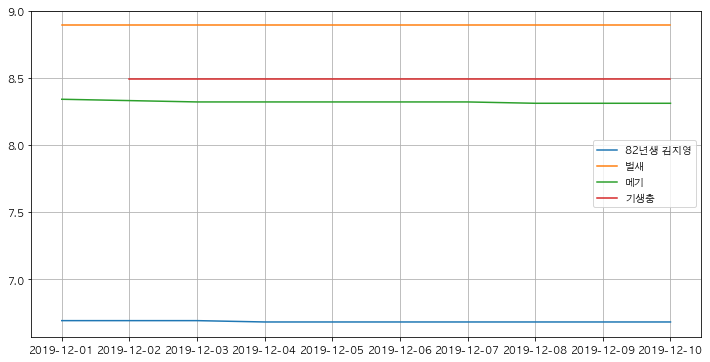

In [123]:
target_col = ['82년생 김지영', '벌새', '메기', '기생충']
plt.figure(figsize=(12,6))
plt.plot(movie_pivot[target_col])
plt.legend(target_col, loc='best')
plt.grid()
plt.show()